In [1]:
# Load nessesery modules and set up
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks_cwt
%matplotlib inline

# Load chessboard images
fname = 'camera_cal/calibration{}.jpg'.format(2)
img = cv2.imread(fname)
print(fname)

camera_cal/calibration2.jpg


[ 149.50816345  169.30766296]


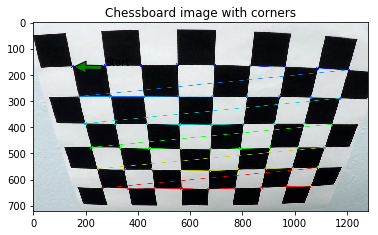

In [71]:
# prepare object points
nx = 9 # The number of inside corners in x
ny = 6 # The number of inside corners in y

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    print(corners[0][0])
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.title("Chessboard image with corners")
    plt.annotate('Start', xy=(corners[0][0]), xytext=(corners[1][0]),
            arrowprops=dict(facecolor='green', shrink=0.05),
            )
    plt.show()
    

camera_cal/calibration1.jpg


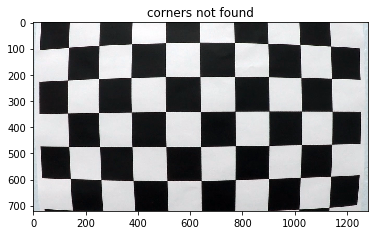

camera_cal/calibration2.jpg


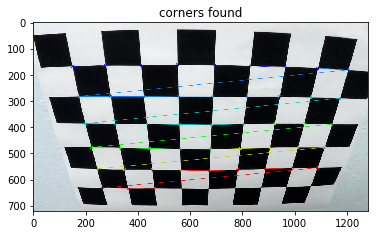

camera_cal/calibration3.jpg


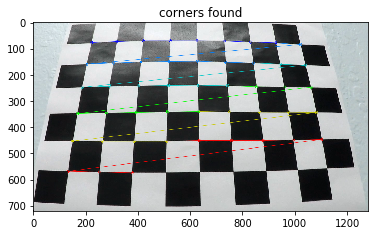

camera_cal/calibration4.jpg


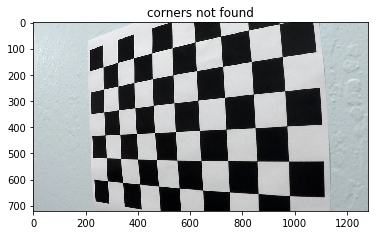

camera_cal/calibration5.jpg


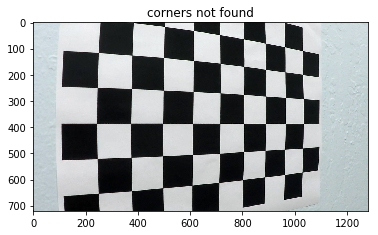

camera_cal/calibration6.jpg


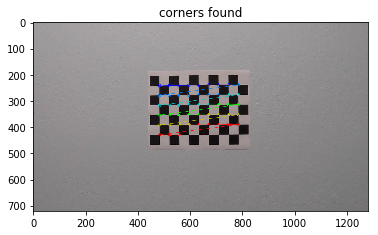

camera_cal/calibration7.jpg


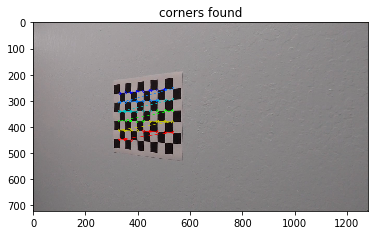

camera_cal/calibration8.jpg


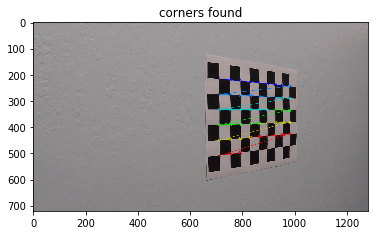

camera_cal/calibration9.jpg


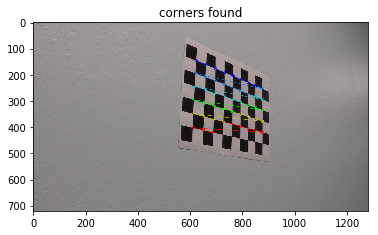

camera_cal/calibration10.jpg


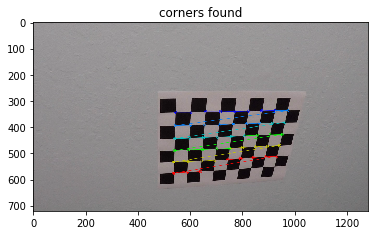

camera_cal/calibration11.jpg


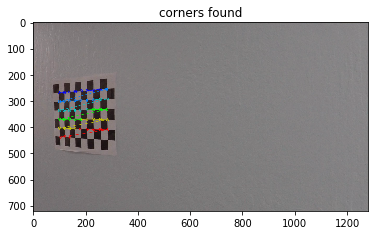

camera_cal/calibration12.jpg


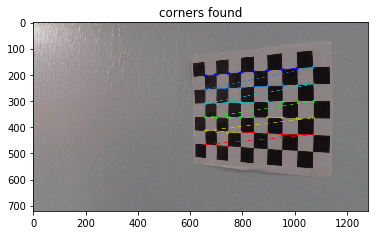

camera_cal/calibration13.jpg


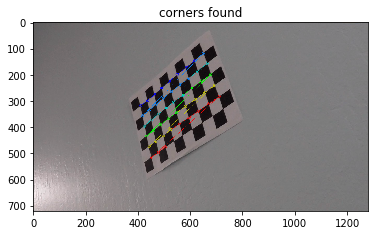

camera_cal/calibration14.jpg


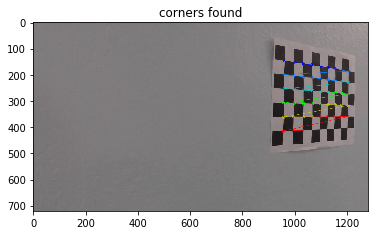

camera_cal/calibration15.jpg


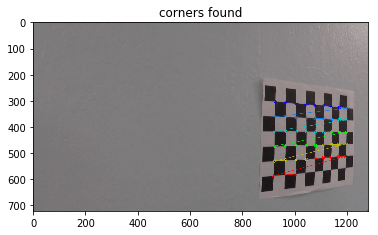

camera_cal/calibration16.jpg


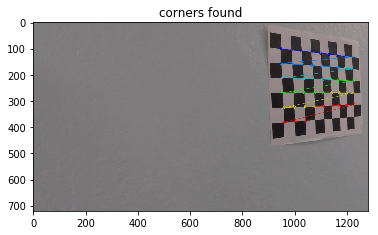

camera_cal/calibration17.jpg


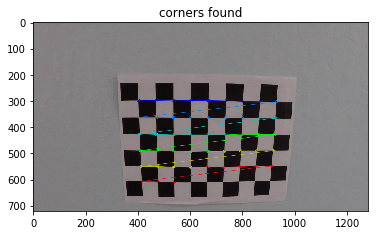

camera_cal/calibration18.jpg


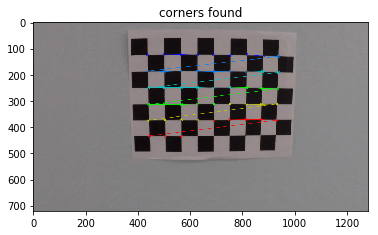

camera_cal/calibration19.jpg


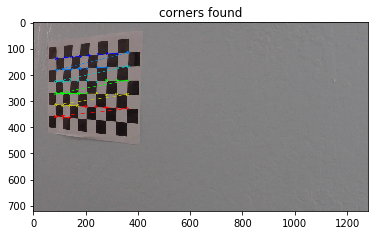

camera_cal/calibration20.jpg


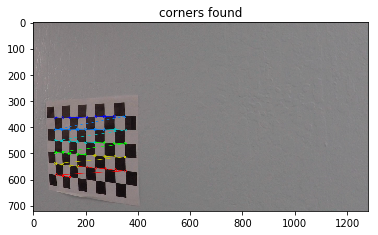

In [75]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Step through the list and search for chessboard corners
for i in range(1,21):
    fname = 'camera_cal/calibration{}.jpg'.format(i)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        print(fname)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        write_name = 'corners found'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        plt.imshow(img)
        plt.title(write_name)
        plt.show()
    else:
        print(fname)
        write_name = 'corners not found'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        plt.imshow(img)
        plt.title(write_name)
        plt.show()

Text(0.5,1,'Undistorted Image')

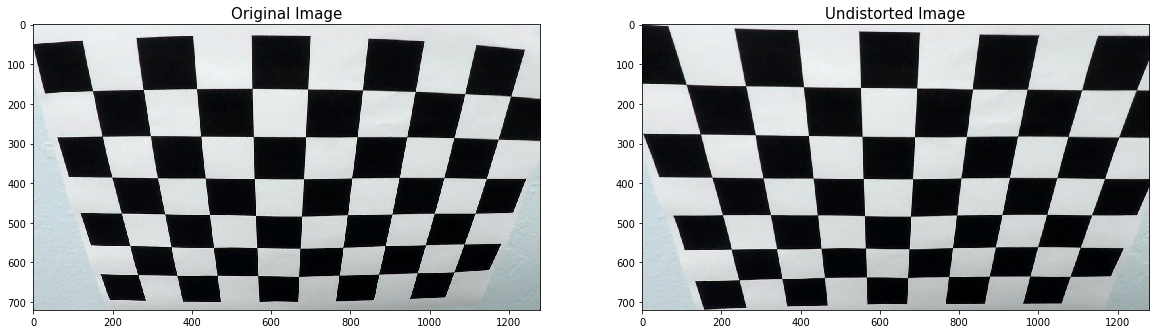

In [18]:
# Test undistortion on an image
fname = 'camera_cal/calibration{}.jpg'.format(2)
img = cv2.imread(fname)
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=15)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=15)

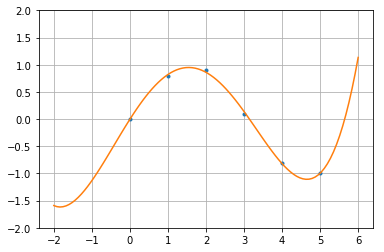

[ 0.02083333 -0.1212963  -0.17361111  1.0978836  -0.00396825]


In [34]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 4)
xp = np.linspace(-2, 6, 100)
p = np.poly1d(z)
plt.plot(x, y, '.', xp, p(xp), '-')
plt.ylim(-2,2)
plt.grid()
plt.show()
print(z) 